In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [2]:
samplerate = 44100
dt = 1/samplerate
t = np.arange(start = 0, stop = 1.5, step = dt)
n = len(t)

In [3]:
signal = 2*np.sin(22 * 2*np.pi * t) + np.sin(33 * 2*np.pi * t)
original_signal = signal.copy()

signal = signal + 10*(2*np.random.rand(n) - 1)

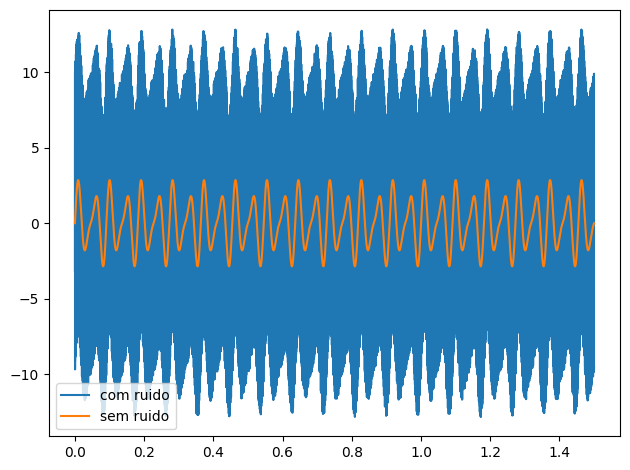

In [4]:
plt.plot(t, signal, label = 'com ruido')
plt.plot(t, original_signal, label = 'sem ruido')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
signal_hat = np.fft.fft(signal)
freq_signal = np.fft.fftfreq(n, d = dt)
signal_hat_abs = np.abs(signal_hat)**2 / n

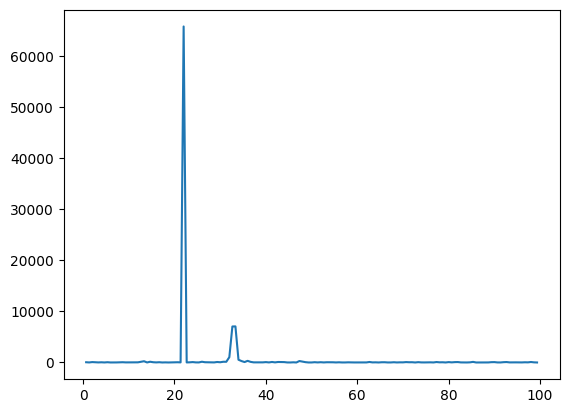

In [6]:
L = np.logical_and(freq_signal > 0, freq_signal < 100)
plt.plot(freq_signal[L], signal_hat_abs[L])
plt.show()

In [7]:
signal_clean_hat = signal_hat.copy()
signal_clean_hat[signal_hat_abs < 1000] = 0
signal_clean = np.fft.ifft(signal_clean_hat)

In [8]:
# plt.plot(t, signal_clean)
# plt.plot(t, original_signal)
# plt.show()